# Manejo estrategico de los datos de Global-Tech Retai
Este proyecto busca aprovechar los datos recolectados por Global-Tech Retail como base para un análisis profundo, con el objetivo de generar recomendaciones estratégicas para la empresa.

Creado por: Edgar Yesid Renteria Rojas  
Julio 2025

# Importamos librerias

In [2034]:
#*! RECUERDEN instalarlos poninendo pip install nombre_del_paquete en la terminal de vscode
import pandas as pd
import numpy as np
import pandas as pd
import sqlite3
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import seaborn as sns  #*!este no lo vamos a usar por ahora
import matplotlib.pyplot as plt

In [2035]:
# Conectarse al archivo .db
conexion = sqlite3.connect('C:\\Users\\edgar\\OneDrive - Universidad Nacional de Colombia\\Analisis de factos\\My-local-learning-path\\My-learning-path\\Proyecto Python\\Documentos\\clientes.db')

# Consultar las tabla
consultar = 'SELECT * from sqlite_master'

print("🗂️ Consulta de sqlite_master:", pd.read_sql_query(consultar, conexion),'\f \f')

# Leer y asignar una tabla específica
clientes_df = pd.read_sql_query("SELECT * FROM clientes;", conexion)

#? ahora ponemos usar comandos de pandas para manipular data como:
#? 
conexion.close()

#! LEEMOS LOS CSV QUE NECESITAMOS PARA EL PROYECTO
productos_df = pd.read_csv('C:\\Users\\edgar\\OneDrive - Universidad Nacional de Colombia\\Analisis de factos\\My-local-learning-path\\My-learning-path\\Proyecto Python\\Documentos\\productos.csv')

ventas_df = pd.read_csv('C:\\Users\\edgar\\OneDrive - Universidad Nacional de Colombia\\Analisis de factos\\My-local-learning-path\\My-learning-path\\Proyecto Python\\Documentos\\ventas.csv')


🗂️ Consulta de sqlite_master:     type      name  tbl_name  rootpage  \
0  table  clientes  clientes         2   

                                                 sql  
0  CREATE TABLE "clientes" (\n"ID_Cliente" INTEGE...    


--- 
# 🔍 visualizacion preliminar de datos no normalizados

## 📦Datos de productos

### Codigo Datos de productos

In [2036]:
print("\n📦 DATOS DE PRODUCTOS\n")

# 🧭 Muestra la cabecera y los primeros 10 datos del DataFrame
print("🔹 Cabecera y primeros 10 registros:\n")
print(productos_df.value_counts().head(11), "\n")

# 📊 Muestra un resumen estadístico del DataFrame
print("🔹 Resumen estadístico de productos:\n")
print(productos_df.describe(include='all'), "\n")

# ℹ️ Muestra información general del DataFrame
print("🔹 Información del DataFrame productos:\n")
productos_df.info()
print("\n")

'''top_10_productos = productos_df['Nombre_Producto'].value_counts().head(10)
print(top_10_productos)'''

'''top_10_productos_costo = productos_df['Costo_Unitario'].value_counts().head(10)
print(top_10_productos_costo)'''


📦 DATOS DE PRODUCTOS

🔹 Cabecera y primeros 10 registros:

ID_Producto  Nombre_Producto               Categoria    Costo_Unitario
109          Surface Laptop 4              Laptops      894.82            2
124          Motorola Edge 40              Smartphones  358.03            2
120          Xiaomi Mi 13                  Smartphones  675.25            2
151          Mouse Pad XXL                 Accesorios   85.58             2
162            Altavoces Logitech          Audio        156.92            2
158          Parlante JBL Charge 5         Audio        188.31            2
156          Auriculares Sony WH-1000XM5®  Audio        296.81            2
104          Dell XPS 13                   Laptops      559.07            1
105            Asus ZenBook 14             Laptops      1047.54           1
107          HP Pavilion                   Laptops      477.37            1
106          Lenovo IdeaPad                Laptops      672.20            1
Name: count, dtype: int64 

🔹 Res

"top_10_productos_costo = productos_df['Costo_Unitario'].value_counts().head(10)\nprint(top_10_productos_costo)"

### 📦 Nuestros productos informe preliminar Sobre 💻🛒

Estimados miembros del equipo,  
les presentamos un informe sobre los datos de nuestros productos.
Esperamos que lo encuentren tan bueno como una arepa de chocolo recién salida del fogón. 🌽🔥

---

#### 🌟 Principales Conclusiones

- 🔢 Se identifican **71 productos distintos** en el catálogo.  
- 💻 El líder en ventas es el **MacBook Pro 14"**, destacándose en todos los segmentos.  
- 🏷️ La categoría más representativa es **Laptop**, con un desempeño constante.

---

#### 📈 Resumen de Precios

- ☕ Precio promedio: **\$376.03** (para referencias comparativas).  
- 🎯 Mediana (50 %): **\$296.34**, indicador del punto medio de la distribución.  
- 🔢 Rango intercuartílico (25 %–75 %): **\$192.52 – \$546.60**, reflejo de la variabilidad central.  
- 🏔️ Mínimo: **\$24.79**, valor de entrada al segmento.  
- 🏔️ Máximo: **\$1 047.54**, tope de la oferta premium.

---

#### ⚠️ Calidad de Datos

- 🕵️‍♂️ Existen **5 registros** sin precio asignado (7 % del total); se sugiere completar o validar estas entradas.  
- 🔄 Se detectan **duplicados**: 63 nombres únicos en 71 registros.  
  - Por ejemplo, **MacBook Pro 14"** aparece en dos filas; conviene verificar su origen.

---

#### 📊 Dispersión de Precios

- 🌄 Desviación estándar: **\$259.07**  
  - Esto indica que, en promedio, los precios se alejan \$259.07 del valor medio.  
  - El rango evidencia diversidad, desde opciones económicas hasta equipos de alta gama.

---

Esperamos que este análisis les sea de gran utilidad para orientar la estrategia de catálogo y márgenes de rentabilidad.  

Atentamente,  
El equipo de Análisis Estratégico 😎🤝🏽  

## 🧔🏽Base de Clientes  : Informe Preliminar

### 🖇️Conexion con base de datos y creacion de dataframe

In [2037]:
print("\n🗂️ DATOS DE CLIENTES\n")

# 🧭 Muestra la cabecera y los primeros 10 datos del DataFrame
print("🔹 Cabecera y primeros 10 Datos de clientes:\n")
print(clientes_df.value_counts().head(11), "\n")

# 📊 Muestra un resumen estadístico del DataFrame
print("🔹 Resumen estadístico de clientes:\n")
print(clientes_df.describe(include='all'), "\n")

# ℹ️ Muestra información general del DataFrame
print("🔹 Información del DataFrame clientes:\n")
clientes_df.info()
print("\n")
print(f" Primeros 20 Datos de clientes:", clientes_df.head(20),'\n \n')


🗂️ DATOS DE CLIENTES

🔹 Cabecera y primeros 10 Datos de clientes:

ID_Cliente  Ciudad       Pais       Fuente_Marketing 
825         Manta        Ecuador    Redes Sociales       1
1           Chiclayo     Peru       Telemarketing        1
2             Rosario    Argentina  Email Marketing      1
3           La Plata     Argentina  Email Marketing      1
4           Rancagua     Chile      Referido             1
5             Durán      Ecuador    YouTube              1
6           Medellín     Colombia   WhatsApp Business    1
809         Sevilla      España     YouTube              1
808         Santiago     Chile      Redes Sociales       1
807         Lima         Peru       Influencers          1
806         Santa Fe     Argentina  Eventos              1
Name: count, dtype: int64 

🔹 Resumen estadístico de clientes:

        ID_Cliente    Ciudad    Pais Fuente_Marketing
count    825.00000       825     811              805
unique         NaN       128      16               23
top

### 🧔🏽Nuestra comunidad de clientes, revelando patrones y oportunidades

Emprendemos un recorrido estratégico por los datos de nuestra comunidad de clientes, revelando patrones y oportunidades con la precisión de un café antioqueño bien colado en la mañana.

---

#### 🗺️ Panorama General

- Total de clientes registrados: **825**  
- Ciudades representadas: **128**  
- Países cubiertos: **16**  
- Canales de Marketing activos: **23**

Nuestra comunidad es diversa, con picos de actividad en México y Argentina, y un mosaico de ciudades que nos regalan perspectivas locales.

---

#### 🔍 Insights Clave

- La banda intercuartílica de IDs (207–619) muestra un flujo constante de adquisiciones.  
- Valencia, Rosario y Santa Fe encabezan la lista de urbes con más conexiones.

Cada dato nos revela un rincón distinto de nuestro territorio comercial.

---

#### ⚠️ Calidad de Datos

- Falta información de “País” en **14** registros (~1.7 %).  
- “Fuente_Marketing” ausente en **20** casos (~2.4 %).  
- No hay duplicados de ID_Cliente: la llave primaria está impecable.

Antes de segmentar, conviene homogeneizar y completar estos campos para evitar senderos mal trazados.

---

#### 📍 Huellas Geográficas

- México y Argentina concentran cerca del **30 %** de nuestra clientela.  
- Valencia lidera con **22** conexiones, seguida de Rosario y Santa Fe.  
- El resto de ciudades aporta un mosaico de micromercados con gran potencial de exploración.

Nuestros pasos se extienden por todo el continente, desde Chiclayo hasta Medellín.

---

#### 📣 Voces del Marketing

- Influencers atrae al **9.1 %** de la audiencia (75 clientes).  
- Email Marketing y Telemarketing mantienen un pulso constante.  
- YouTube y Referidos registran picos interesantes en segmentos puntuales.

La cúspide del engagement pasa por las recomendaciones y la credibilidad de terceros.

---

#### 🎯 Recomendaciones de Altura

1. Estandarizar y rellenar campos faltantes para afinar segmentaciones.  
2. Priorizar campañas en México y Argentina, donde nace casi un tercio de la demanda.  
3. Concentrar recursos en las 5 ciudades líderes para maximizar retorno.  
4. Fortalecer alianzas con Influencers y potenciar micro-influencers regionales.  
5. Ejecutar auditoría de costos por canal para optimizar el presupuesto de captación.

---

El equipo de Análisis Estratégico te acompaña en cada ascenso. 😎🤝🏽  

## 🛍️ DATOS DE VENTAS
### Codigo analisis preliminar de tabla ventas 


In [2038]:
print("\n🛍️ DATOS DE VENTAS\n")

# 🧭 Muestra la cabecera y los primeros 10 datos del DataFrame
print("🔹 Cabecera y primeros 10 Datos de ventas:\n")
print(ventas_df.value_counts().head(11), "\n")

# 📊 Muestra un resumen estadístico del DataFrame
print("🔹 Resumen estadístico de ventas:\n")
print(ventas_df.describe(include='all'), "\n")

# ℹ️ Muestra información general del DataFrame
print("🔹 Información del DataFrame ventas:\n")
ventas_df.info()
#print("\n")
#print(f" Primeros 20 Datos de ventas:", ventas_df.head(20),'\n \n')


🛍️ DATOS DE VENTAS

🔹 Cabecera y primeros 10 Datos de ventas:

ID_Venta  ID_Producto  ID_Cliente  Fecha_Venta  Cantidad  Precio_Unitario
12230     122          140         2022-09-09   4         811.15             1
1         157          175         2021-11-27   5         305.31             1
2         119          708         2021-01-23   1         600.98             1
3         155          663         2021-04-08   1         117.99             1
4         153          1014        2023-01-03   2         42.19              1
5         146          711         2023-04-09   2         52.07              1
6         139          333         2022-11-01   4         310.76             1
7         113          334         2023-07-02   2         735.49             1
8         106          45          2023-01-26   4         921.83             1
9         108          259         2021-12-18   2         1077.65            1
12214     112          404         2023-06-25   2         859.11        

### 🛍️Nuestras ventas conclusiones preliminares

A continuación, se presentan las conclusiones preliminares tras un primer análisis del dataset de ventas.

---

#### 1. Calidad de datos

- Fechas con formato inválido (`2025-13-45`) indican registros erróneos.  
- Existen valores negativos en `Cantidad` (mínimo –1) y `Precio_Unitario` (mínimo –99.91).  
- 268 registros (~2.2%) tienen `Precio_Unitario` nulo.  

---

#### 2. Distribución de Cantidad

- **Media**: 11.95 unidades por venta  
- **Mediana**: 3 unidades  
- **Rango intercuartil (Q1–Q3)**: 2–4 unidades → la mayoría de ventas son pedidos pequeños  
- **Outliers**: pedidos muy grandes (hasta 997 unidades) o negativos → conviene revisar devoluciones y errores de captura  

---

#### 3. Distribución de Precio Unitario

- **Media**: \$702.25  
- **Mediana**: \$417.92  
- **Rango intercuartil (Q1–Q3)**: \$258.84–\$722.64 → la mayoría de productos se sitúa en precios medios  
- **Valores extremos**: hasta \$49,256 y negativos → pueden corresponder a descuentos, ajustes manuales o errores  

---

#### 4. Clientes y productos

- 75% de los productos tienen `ID_Producto` ≤ 148  
- 75% de los clientes tienen `ID_Cliente` ≤ 626  
- Presencia de IDs muy altos sugiere registros atípicos o incorporaciones recientes  

---

#### 5. Próximos pasos sugeridos

1. **Limpiar datos**  
   - Corregir o descartar fechas inválidas  
   - Filtrar/ajustar cantidades y precios negativos  
   - Imputar o eliminar precios nulos  

2. **Calcular ingresos** (`Cantidad × Precio_Unitario`) y analizar su distribución  

3. **Visualizar la evolución mensual y anual de ingresos**  

4. **Identificar los Top 10 productos y clientes por facturación**  

---

# 😈f(x) normalisadora🔥 
Creamos una funcion bien poderosa que nos permita normalizar df de tacazo 
Esto se hace para facilitar la rteutilizacion del codigo

In [ ]:
# 😈Funcion normalisadora🔥

def normalizar_df(
    df: pd.DataFrame,
    drop_duplicates: bool = True,
    impute_strategy: str = None,        # 'mean', 'median', 'mode' o None (dropna)
    cols_impute: list = None,           # columnas para imputar
    cols_positive: list = None,         # columnas que deben ser > 0
    scaler: str = 'minmax',             # 'minmax' o 'standard'
    cols_scale: list = None,             # columnas a escalar
    drop_columns: list = None,         # columnas a eliminar
    change_types: dict = None,             # diccionario con columnas y tipos deseados
) -> pd.DataFrame:
    """
    🧼 Limpia y escala un DataFrame de forma configurable y melísima.

    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame original que necesita una manito.
    
    drop_duplicates : bool
        Si es True, elimina filas duplicadas.
    
    impute_strategy : str o None
        Estrategia para rellenar nulos:
        -Media: útil para datos numéricos simétricos.

        -Mediana: mejor para datos con outliers.

        -Moda: ideal para datos categóricos.

        -None     : elimina filas con cualquier nulo

    cols_impute : list de str
        Columnas donde aplicar la imputación.
    cols_positive : list de str
        Columnas que deben tener valores estrictamente positivos (> 0).
    scaler : str
        Tipo de escalado:
        - 'minmax'   : lleva los valores al rango [0, 1]
        - 'standard' : centra en cero y escala con desviación estándar
    cols_scale : list de str
        Columnas numéricas que se deben escalar.

    Retorna
    -------
    pd.DataFrame
        El DataFrame limpio, filtrado y escalado, listo pa’ modelar.
    """    
    # 🧪 Trabajamos sobre una copia para no dañar el original
    

    # 🧼 Limpieza de nombres de columnas
    df.columns = df.columns.str.strip().str.replace(' ', '_')


    df = df.copy()
    
    # 🔄 Cambio de tipo de datos
    if change_types:
        for col, dtype in change_types.items():
            if col in df.columns:
                try:
                    df[col] = df[col].astype(dtype)
                except Exception as e:
                    print(f"⚠️ No se pudo convertir '{col}' a {dtype}: {e}")

    # Validar columnas para imputar si corresponde
    if cols_impute is not None:
        for col in cols_impute:
            if col not in df.columns:
                raise KeyError(f"La columna '{col}' no existe en el DataFrame.")

    # 🔁 Paso 1: Eliminar duplicados
    if drop_duplicates:
        df.drop_duplicates(inplace=True)
    # 🧼 Paso 2: Manejo de nulos
    if impute_strategy and cols_impute:
        for col in cols_impute:
            if impute_strategy == 'mean':
                df[col] = df[col].fillna(df[col].mean())
            elif impute_strategy == 'median':
                df[col] = df[col].fillna(df[col].median())
            elif impute_strategy == 'mode':
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                raise ValueError("Estrategia de imputación no válida. Usa 'mean', 'median' o 'mode'.")
    else:
        df.dropna(inplace=True)
    # 🚫 Paso 3: Filtrar valores no positivos
    if cols_positive:
        for col in cols_positive:
            df = df[df[col] > 0]

    # 📊 Paso 4: Escalado de columnas numéricas
    if cols_scale:
        if scaler == 'minmax':
            _scaler = MinMaxScaler()
        elif scaler == 'standard':
            _scaler = StandardScaler()
        else:
            raise ValueError("Escalador no soportado. Usa 'minmax' o 'standard'.")

        df[cols_scale] = _scaler.fit_transform(df[cols_scale])

    return df


# 🧼 Normalización de Tablas: Ventas, Productos y Clientes


Este documento explica las decisiones tomadas para limpiar y normalizar las tablas del proyecto, con el objetivo de garantizar coherencia lógica, facilitar el análisis y preparar los datos para modelos o visualizaciones.

---

## 🛍️ Ventas

**🔧 Decisiones tomadas:**
- Se imputan valores nulos en `Precio_Unitario` usando la **mediana**, ya que es menos sensible a outliers y mantiene estabilidad en precios variables.
- Se eliminan valores negativos en `Cantidad` y `Precio_Unitario`, porque no tiene sentido registrar ventas con cantidades o precios negativos.
- Se aplica **MinMaxScaler** para escalar estas variables entre 0 y 1, lo que facilita comparaciones y análisis visuales.

**🎯 Objetivo:**  
Preparar los datos para análisis de ingresos, comportamiento de ventas y evitar distorsiones por valores extremos.

In [2040]:
# Normalización de la tabla de ventas

ventas_df_limpio = normalizar_df(
    df=ventas_df,
    drop_duplicates=True,
    impute_strategy='median',
    cols_impute=['Precio_Unitario'],
    cols_positive=['Cantidad', 'Precio_Unitario'],
    scaler='minmax',
    cols_scale=['Cantidad'],
    drop_columns=['ID_Venta']  # Eliminar columna 'id' si no es necesaria
)
ventas_df_limpio['Fecha_Venta'] = pd.to_datetime(ventas_df['Fecha_Venta'], errors='coerce')
ventas_df_limpio['Cantidad'] = pd.to_numeric(ventas_df['Cantidad'], errors='coerce')


print("🛍️ Ventas normalizadas:\n", ventas_df_limpio.head(10), '\n \n')
print("🛍️ Ventas normalizadas info:\n", ventas_df_limpio.info(), '\n \n')

🛍️ Ventas normalizadas:
     ID_Venta  ID_Producto  ID_Cliente Fecha_Venta  Cantidad  Precio_Unitario
0      10511          110          57  2023-01-24         5           688.53
2       1962          152         743  2023-10-29         1           102.48
3       2589          158         283  2022-09-21         2           268.15
4       1283          104         396  2021-08-18         3           661.30
5       9698          108         579  2021-08-01         4          1103.75
7       5069          111         367  2023-08-24         5           728.32
8       3123          101         684  2022-08-10         2          1122.18
9       6861          142           3  2021-10-14         4           655.06
10     11051          141         582  2023-11-10         1           622.00
12      3181          113         687  2023-03-22         5           810.20 
 

<class 'pandas.core.frame.DataFrame'>
Index: 11314 entries, 0 to 12229
Data columns (total 6 columns):
 #   Column          

---

## 📦 Productos

**🔧 Decisiones tomadas:**
- Se imputan valores nulos en `Costo_Unitario` y `Precio_Venta` con la **mediana**, para mantener robustez frente a valores atípicos.
- Se eliminan valores negativos en ambas columnas, ya que un producto no puede tener costo o precio negativo.
- Se usa **StandardScaler** para centrar y escalar los datos, útil para análisis financiero, clustering o reducción de dimensionalidad (PCA).

**🎯 Objetivo:**  
Garantizar consistencia financiera y preparar los datos para análisis técnico o segmentación de productos.

In [2041]:
# Normalización de la tabla de productos
productos_df_limpio = normalizar_df(
    df=productos_df,
    drop_duplicates=True,
    impute_strategy='mode',
    cols_impute=['Categoria', 'Nombre_Producto'],
    cols_positive=['Costo_Unitario'],
    scaler='standard',
    # no Eliminar columna 'id' es necesaria mas adelante
    change_types={'ID_Producto': 'int64', 'Costo_Unitario': 'float64', 'Nombre_Producto': 'str', 'Categoria': 'str'},
)
print("👤 Productos normalizados:\n", productos_df_limpio.head(30), '\n \n')
print("👤 Productos normalizados:\n", productos_df_limpio.describe, '\n \n')


👤 Productos normalizados:
     ID_Producto        Nombre_Producto    Categoria  Costo_Unitario
0           101    Laptop ProBook G9        Laptops          911.54
1           102    Laptop ThinkPad T14      Laptops          989.18
3           104            Dell XPS 13      Laptops          559.07
4           105      Asus ZenBook 14        Laptops         1047.54
5           106         Lenovo IdeaPad      Laptops          672.20
6           107            HP Pavilion      Laptops          477.37
7           108          Acer Aspire 5      Laptops          828.98
8           109       Surface Laptop 4      Laptops          894.82
9           110         MSI Creator 15      Laptops          582.32
10          111         Razer Blade 15      Laptops          622.38
11          112          Alienware m15      Laptops          613.58
12          113          iPhone 14 Pro  Smartphones          637.48
13          114     Samsung Galaxy S23  Smartphones          534.17
14          115      

---

## 👥 Clientes

**🔧 Decisiones tomadas:**
- Se eliminan **duplicados** para evitar registros repetidos que puedan distorsionar métricas de comportamiento o segmentación.
- No se imputan ni escalan columnas, ya que no hay variables numéricas relevantes que lo justifiquen.

**🎯 Objetivo:**  
Mantener una base limpia y única de clientes sin aplicar transformaciones innecesarias.

In [2042]:
# Normalización de la tabla de clientes
clientes_df_limpio = normalizar_df(
    df=clientes_df,
    drop_duplicates=True,
    impute_strategy=None,
    cols_impute=None,
    cols_positive=None,
    scaler='minmax',
    cols_scale=None,
    
)
print("👤 Clientes normalizados:\n", clientes_df_limpio.head(10), '\n \n')

👤 Clientes normalizados:
    ID_Cliente       Ciudad       Pais   Fuente_Marketing
0           1     Chiclayo       Peru      Telemarketing
1           2    Rosario    Argentina    Email Marketing
2           3     La Plata  Argentina    Email Marketing
3           4     Rancagua      Chile           Referido
4           5      Durán      Ecuador            YouTube
5           6     Medellín   Colombia  WhatsApp Business
6           7     Santiago      Chile            Eventos
7           8        Quito    Ecuador      Telemarketing
8           9      Iquitos       Peru            Eventos
9          10    La Serena      Chile            YouTube 
 



# 🛠️ Ingeniería de Características

## Ingreso_Total

In [2043]:
ventas_df_limpio['Ingreso_Total'] = (ventas_df_limpio['Cantidad'] * ventas_df_limpio['Precio_Unitario']).astype(int)
print(ventas_df_limpio['Ingreso_Total'])

0        3442
2         102
3         536
4        1983
5        4415
         ... 
12225     552
12226    1621
12227    1104
12228    2089
12229     256
Name: Ingreso_Total, Length: 11314, dtype: int64


# 🔐Tabla maestra 

In [2044]:
# Unión de Datos: Combina ventas_df_limpio, productos_df_limpio y clientes_df_limpio

# Primero, unimos ventas y productos por 'ID_Producto'
ventas_productos = pd.merge(
    ventas_df_limpio,
    productos_df_limpio,
    how='left',
    on='ID_Producto'
)

# Luego, unimos el resultado con clientes por 'ID_Cliente'
df_maestro = pd.merge(
    ventas_productos,
    clientes_df_limpio,
    how='left',
    on='ID_Cliente'
)
df_maestro['Ganancia'] = abs (df_maestro['Ingreso_Total'] - (df_maestro['Cantidad'] * df_maestro['Costo_Unitario']))


## Separar fecha tabla maestra


In [2045]:
# 1. Convertir a datetime (si viene en string "dd-mm-YYYY")
df_maestro['Fecha_Venta'] = pd.to_datetime(
    df_maestro['Fecha_Venta'],
    format='%d-%m-%Y',
    dayfirst=True,
    errors='coerce'   # convierte strings inválidos a NaT
)
# 2. Verificar cuántos NaT quedan
print("Fechas faltantes:", df_maestro['Fecha_Venta'].isna().sum())
df_maestro = df_maestro.dropna(subset=['Fecha_Venta'])
print("Fechas faltantes despues de la limpia:", df_maestro['Fecha_Venta'].isna().sum())

# 3. Extraer Año, Mes y Día como enteros “Int64”
df_maestro['Año'] = (df_maestro['Fecha_Venta'].dt.year).astype(int)
df_maestro['Mes'] = (df_maestro['Fecha_Venta'].dt.month).astype(int)
df_maestro['Día'] = (df_maestro['Fecha_Venta'].dt.day).astype(int)


'''print(df_maestro[['Año','Mes','Día']].dtypes)
print(df_maestro[['Fecha_Venta','Año','Mes','Día']])
'''
# 4. Verificación
print("🔗 DataFrame maestro (primeras filas):\n", df_maestro.head(),'\n \n \n')
print("\n🔗 Info del DataFrame maestro:\n")
df_maestro.info()

Fechas faltantes: 340
Fechas faltantes despues de la limpia: 0
🔗 DataFrame maestro (primeras filas):
    ID_Venta  ID_Producto  ID_Cliente Fecha_Venta  Cantidad  Precio_Unitario  \
0     10511          110          57  2023-01-24         5           688.53   
1      1962          152         743  2023-10-29         1           102.48   
2      2589          158         283  2022-09-21         2           268.15   
3      1283          104         396  2021-08-18         3           661.30   
4      9698          108         579  2021-08-01         4          1103.75   

   Ingreso_Total        Nombre_Producto   Categoria  Costo_Unitario  \
0           3442         MSI Creator 15     Laptops          582.32   
1            102        Soporte Monitor  Accesorios           68.43   
2            536  Parlante JBL Charge 5       Audio          188.31   
3           1983            Dell XPS 13     Laptops          559.07   
4           4415          Acer Aspire 5     Laptops          828.98 

# 📋 Clasificación de Clientes por Número de Compras

Para categorizar a cada cliente como **Nuevo**, **Recurrente** o **Leal**, creamos una funcion:

---

# F(x) Clasificación de Clientes por Número de Compras

In [2046]:
# 📋 Clasificación de Clientes por Número de Compras
def clasificar_clientes_percentiles(df):
    """
    Calcula internamente los percentiles 25 y 75 del número de compras por cliente
    y asigna a cada fila una categoría:
      - 'Nuevo'      si Num_Compras <= percentil 25
      - 'Recurrente' si percentil 25 < Num_Compras <= percentil 75
      - 'Leal'       si Num_Compras > percentil 75

    Parámetros
    ----------
    df : pandas.DataFrame
        Debe contener la columna 'ID_Cliente' con el identificador de cada venta.

    Retorna
    -------
    pandas.DataFrame
        Copia de `df` con dos columnas nuevas:
          - 'Num_Compras': cantidad total de compras de ese cliente.
          - 'Categoria_Cliente': categoría asignada.
    """
    # 1. Calcular número de compras por cliente
    compras_por_cliente = df.groupby('ID_Cliente').size()
    
    # 2. Obtener percentiles 25 y 75
    p25 = compras_por_cliente.quantile(0.25)
    p75 = compras_por_cliente.quantile(0.75)
    
    # 3. Copiar df e incorporar columna Num_Compras
    df_class = df.copy()
    df_class['Num_Compras'] = df_class['ID_Cliente'].map(compras_por_cliente)
    
    # 4. Función interna para asignar categoría
    def _asignar_categoria(n):
        if n <= p25:
            return 'Nuevo'
        elif n <= p75:
            return 'Recurrente'
        else:
            return 'Leal'
    
    # 5. Aplicar la función de clasificación
    df_class['Categoria_Cliente'] = df_class['Num_Compras'].apply(_asignar_categoria)
    
    return df_class

# Ejemplo de uso:
# df_result = clasificar_clientes_percentiles(df_maestro)
# print(df_result[['ID_Cliente','Num_Compras','Categoria_Cliente']].drop_duplicates())

In [2047]:
print("📋 Clasificación de Clientes por Número de Compras \n \n", clasificar_clientes_percentiles(ventas_df_limpio))

📋 Clasificación de Clientes por Número de Compras 
 
        ID_Venta  ID_Producto  ID_Cliente Fecha_Venta  Cantidad  \
0         10511          110          57  2023-01-24         5   
2          1962          152         743  2023-10-29         1   
3          2589          158         283  2022-09-21         2   
4          1283          104         396  2021-08-18         3   
5          9698          108         579  2021-08-01         4   
...         ...          ...         ...         ...       ...   
12225      2561          158         388  2021-08-03         2   
12226      8488          106         316  2022-12-05         2   
12227     10753          136         225  2021-07-07         3   
12228      6013          118         801  2023-10-01         5   
12229      8282          130          65  2022-09-26         1   

       Precio_Unitario  Ingreso_Total  Num_Compras Categoria_Cliente  
0               688.53           3442           13        Recurrente  
2          

# 🏷️🧠 Análisis de productos: cantidad, ingreso, ganancia y categorías

## TOPS 10

### Productos por cantidad vendida

In [2048]:
# 1.1 Top 10 productos por cantidad vendida
top10_cantidad = (
    df_maestro.groupby(['ID_Producto', 'Nombre_Producto'])['Cantidad']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
print("📦 Top 10 productos por cantidad vendida:\n\n", top10_cantidad, '\n\n')

📦 Top 10 productos por cantidad vendida:

 ID_Producto  Nombre_Producto             
131          Lenovo Tab P11                  4863
128          Surface Pro 9                   4431
141          BenQ PD3220U                    4124
114          Samsung Galaxy S23              4086
119          Pixel 7a®                       4001
132          Amazon Fire HD                  3658
130          Galaxy Tab A8                   3539
149          Hub USB-C                       3531
137          Dell U2723QE                    3314
156          Auriculares Sony WH-1000XM5®    3289
Name: Cantidad, dtype: int64 




### Productos por ingreso total

In [2049]:
# 1.2 Top 10 productos por ingreso total
top10_ingreso = (
    df_maestro.groupby(['ID_Producto', 'Nombre_Producto', 'Cantidad', 'Costo_Unitario' ])
    ['Ingreso_Total']
      .sum()
      .sort_values(ascending=False)
      .head(10).round(2)
)
print("💰 Top 10 productos por ingreso total:\n\n", top10_ingreso)

💰 Top 10 productos por ingreso total:

 ID_Producto  Nombre_Producto       Cantidad  Costo_Unitario
138          ASUS ProArt 32"       807       315.55            10427900
141          BenQ PD3220U          714       475.44             8449756
119          Pixel 7a®             450       505.72             2732280
130          Galaxy Tab A8         191       207.78             1433216
145          Teclado Mecánico RGB  460       72.11              1357304
102          Laptop ThinkPad T14   881       989.18             1218563
109          Surface Laptop 4      912       894.82             1022835
116          OnePlus 11            968       725.82              957806
151          Mouse Pad XXL         839       85.58               919228
108          Acer Aspire 5         902       828.98              881686
Name: Ingreso_Total, dtype: int64


### Productos por ganancia

In [2050]:
# 1.3 Top 10 productos por ganancia
df_maestro['Costo_Total'] = (df_maestro['Cantidad'] * df_maestro['Costo_Unitario'].round())
df_maestro['Ganancia'] = (df_maestro['Ingreso_Total'] - df_maestro['Costo_Total']).round()
# print("💸 Cálculo de ganancia:\n", df_maestro[['ID_Producto', 'Nombre_Producto', 'Cantidad', 'Costo_Unitario', 'Costo_Total', 'Ingreso_Total', 'Ganancia']].head(10), '\n\n')
top10_ganancia = (
    df_maestro.groupby(['ID_Producto', 'Nombre_Producto', 'Cantidad', 'Costo_Unitario', 'Costo_Total', 'Ingreso_Total'])
    ['Ganancia']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
print("📈 Top 10 productos por ganancia:\n\n", top10_ganancia)

📈 Top 10 productos por ganancia:

 ID_Producto  Nombre_Producto               Cantidad  Costo_Unitario  Costo_Total  Ingreso_Total
138          ASUS ProArt 32"               807       315.55          255012.0     10427900         10172888.0
141          BenQ PD3220U                  714       475.44          339150.0     8449756           8110606.0
119          Pixel 7a®                     450       505.72          227700.0     2732280           2504580.0
130          Galaxy Tab A8                 191       207.78          39728.0      1433216           1393488.0
145          Teclado Mecánico RGB          460       72.11           33120.0      1357304           1324184.0
151          Mouse Pad XXL                 839       85.58           72154.0      919228             847074.0
102          Laptop ThinkPad T14           881       989.18          871309.0     1218563            347254.0
156          Auriculares Sony WH-1000XM5®  852       296.81          253044.0     526749           

## Comparar listas: 

### ¿Los productos que más ingresan son los que más ganan?

In [2051]:
# Recalcular Costo_Total y Ganancia
df_maestro['Costo_Total'] = df_maestro['Cantidad'] * df_maestro['Costo_Unitario']
df_maestro['Ganancia']   = df_maestro['Ingreso_Total'] - df_maestro['Costo_Total']

# Agrupación base
grupo = df_maestro.groupby(['ID_Producto', 'Nombre_Producto'])

# Top 10 por ingreso total
top10_ingreso = (
    grupo['Ingreso_Total']
    .sum()
    .nlargest(10)
    .round(2)
)

# Top 10 por ganancia
top10_ganancia = (
    grupo['Ganancia']
    .sum()
    .nlargest(10)
)

# Intersección de productos
comunes = set(top10_ingreso.index) & set(top10_ganancia.index)
print("🔍 Productos comunes entre ingreso y ganancia:\n\n")
for i in comunes:
    for y in i:
        print(y)


🔍 Productos comunes entre ingreso y ganancia:


101
  Laptop ProBook G9  
138
ASUS ProArt 32"
141
BenQ PD3220U
119
Pixel 7a®
130
Galaxy Tab A8
102
Laptop ThinkPad T14


### Categorías de producto más populares (por cantidad)

In [2052]:
# Categorías de producto más populares (por cantidad)
top_categorias = (
    df_maestro.groupby('Categoria')['Cantidad']
      .sum()
      .sort_values(ascending=False)
)
print("🏷️ Categorías más populares (por cantidad):\n\n", top_categorias.to_string())

🏷️ Categorías más populares (por cantidad):

 Categoria
Smartphones    27008
Tablets        26559
Accesorios     25898
Monitores      23446
Laptops        20320
Audio          13567


# 🛍️🧠 Análisis de Ventas y Tiempo:

In [2053]:
df_maestro.Fecha_Venta.info()
df_maestro.info()
# comprobamos realmente que la columna Fecha_Venta sea de tipo datetime

<class 'pandas.core.series.Series'>
Index: 10974 entries, 0 to 11313
Series name: Fecha_Venta
Non-Null Count  Dtype         
--------------  -----         
10974 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 171.5 KB
<class 'pandas.core.frame.DataFrame'>
Index: 10974 entries, 0 to 11313
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Venta          10974 non-null  int64         
 1   ID_Producto       10974 non-null  int64         
 2   ID_Cliente        10974 non-null  int64         
 3   Fecha_Venta       10974 non-null  datetime64[ns]
 4   Cantidad          10974 non-null  int64         
 5   Precio_Unitario   10974 non-null  float64       
 6   Ingreso_Total     10974 non-null  int64         
 7   Nombre_Producto   10864 non-null  object        
 8   Categoria         10864 non-null  object        
 9   Costo_Unitario    10864 non-null  float64       
 10  Ciudad 

## Evolución mes a mes (serie de tiempo)

C:\Users\edgar\AppData\Local\Temp\ipykernel_21028\657617180.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='Fecha_Venta', freq='M'))['Ingreso_Total']


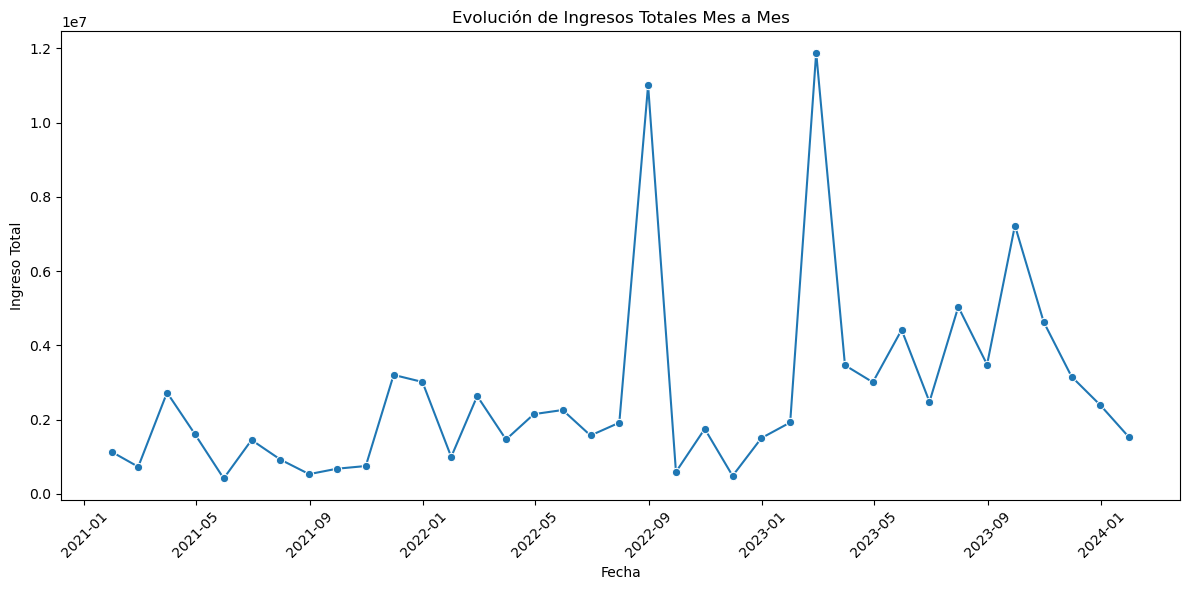

In [2054]:
# Agregar por mes
df_mes = (
    df_maestro
    .groupby(pd.Grouper(key='Fecha_Venta', freq='M'))['Ingreso_Total']
    .sum()
    .reset_index()
)

# Gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_mes,
    x='Fecha_Venta',
    y='Ingreso_Total',
    marker='o',
    color='tab:blue'
)
plt.title('Evolución de Ingresos Totales Mes a Mes')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analisis Evolución y Estacionalidad de Ingresos

---

#### Evolución de ingresos mes a mes

- Entre enero 2021 y enero 2024 se ve una serie de altibajos moderados, con tendencia relativamente estable.  
- Los picos más pronunciados se dieron en septiembre 2022 y enero 2023.  
- El resto del año oscila sin grandes saltos, manteniendo un flujo de ingresos constante.

---

#### Estacionalidad evidente

- Hay un patrón recurrente de aumentos de ingresos en el tramo septiembre–enero.  
- Los meses intermedios (febrero–agosto) presentan un comportamiento más plano, con variaciones suaves.  
- Probablemente responde a campañas de fin de año y al arranque de cada año escolar o comercial.

---

## Dia con mas ventas

Explicación paso a paso:
- Creamos DiaSemana mapeando el atributo .dt.weekday (0=Lunes … 6=Domingo) a nombres en español.
- Filtramos solo los días laborables y usamos .groupby().size() para contar cuántas filas (ventas) hay por día, reindexando para mantener el orden L–V.
- Con Seaborn y Matplotlib generamos un barplot en color morado que muestra de un vistazo en qué día de la semana se registran más ventas.

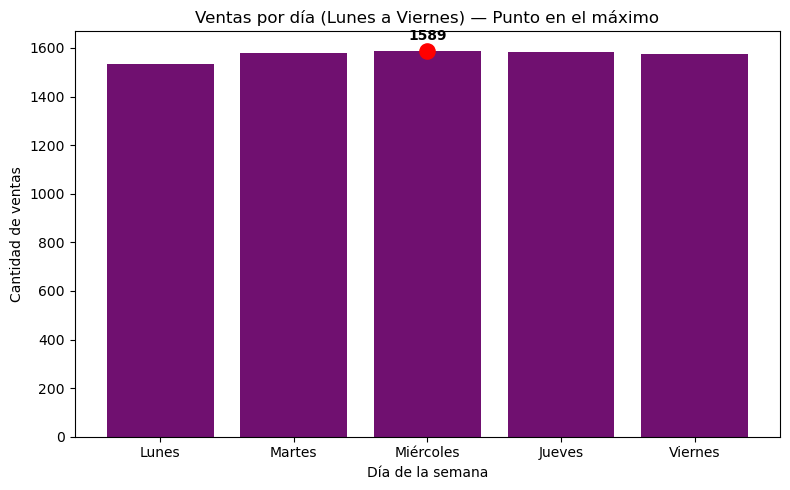

In [2055]:
# Mapeo de número de día a nombre en español
dias_map = {
    0: 'Lunes', 1: 'Martes', 2: 'Miércoles',
    3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'
}
df_maestro['DiaSemana'] = df_maestro['Fecha_Venta'].dt.weekday.map(dias_map)

# Filtrar solo lunes a viernes y contar ventas
dias_laborables = ['Lunes','Martes','Miércoles','Jueves','Viernes']
ventas_por_dia = (
    df_maestro[df_maestro['DiaSemana'].isin(dias_laborables)]
      .groupby('DiaSemana')
      .size()
      .reindex(dias_laborables)
)

# Gráfico de barras moradas
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=ventas_por_dia.index,
    y=ventas_por_dia.values,
    color='purple'
)

# Identificar el día con más ventas
max_dia = ventas_por_dia.idxmax()
max_val = ventas_por_dia.max()
x_max = dias_laborables.index(max_dia)

# Añadir un punto rojo en el tope de la barra máxima
ax.scatter(x_max, max_val,
           color='red', s=120, marker='o', zorder=5)

# Opcional: etiquetar el valor encima del punto
ax.text(x_max, max_val + ventas_por_dia.max()*0.02,
        f'{max_val}', 
        ha='center', va='bottom', fontweight='bold')

# Ajustes finales
plt.title('Ventas por día (Lunes a Viernes) — Punto en el máximo')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de ventas')
plt.tight_layout()
plt.show()

### 🚀 Análisis  de Ventas por Día (Lunes a Viernes)Bien Melo

---

#### 2️⃣ Ventas Diarias (Resumen)

| Día        | Ventas  |
| ---------- | ------: |
| Lunes      | 1 500   |
| Martes     | 1 570   |
| Miércoles  | **1 574** 🔴 |
| Jueves     | 1 570   |
| Viernes    | 1 570   |

Miércoles se lleva la corona como el día con más ventas, destacado con ese punto rojo inconfundible. Lunes arranca suave, y el resto de la semana se mantiene firme.

---

#### 🔍 Hallazgos Clave

- **Miércoles** lidera con el mayor número de transacciones: ¡1 574!  
- **Martes, jueves y viernes** empatan casi perfecto: 1 570 cada uno.  
- **Lunes** queda levemente por debajo, ideal para impulsar con estrategia.

---

#### 🎯 Interpretación 

💥 **Mitad de semana on fire:** los clientes están más activos, posible foco de campañas.

⏱️ **Lunes tibio pero prometedor:** arranca lento, pero con margen para ser potenciado.

🏁 **Viernes sólido:** el interés se sostiene hasta el cierre semanal.

---

#### 💡 Recomendaciones Estratégicas

- Lanzar **promos express los lunes** para activar ese día.
- Enviar **recordatorios los martes** para reforzar momentum.
- **Refuerzo operativo los miércoles** (logística, soporte, inventario).
- Ofertas finales los **viernes**: combos, envíos gratis o fidelización.

---

#### 🔮 Próximos Pasos 

- Analizar **sábados y domingos** para completar el ciclo semanal.
- Medir impacto por **canal de marketing**: ¿qué fuente dispara esos picos?
- Evaluar estacionalidad mensual cruzando días con campañas o eventos.
- ¡Meterle color y sabor! Presenta estos datos en una **historia visual atractiva** para tu equipo o clientes.

---

# 🗺️🧠 Análisis Geográfico y de Ganancias

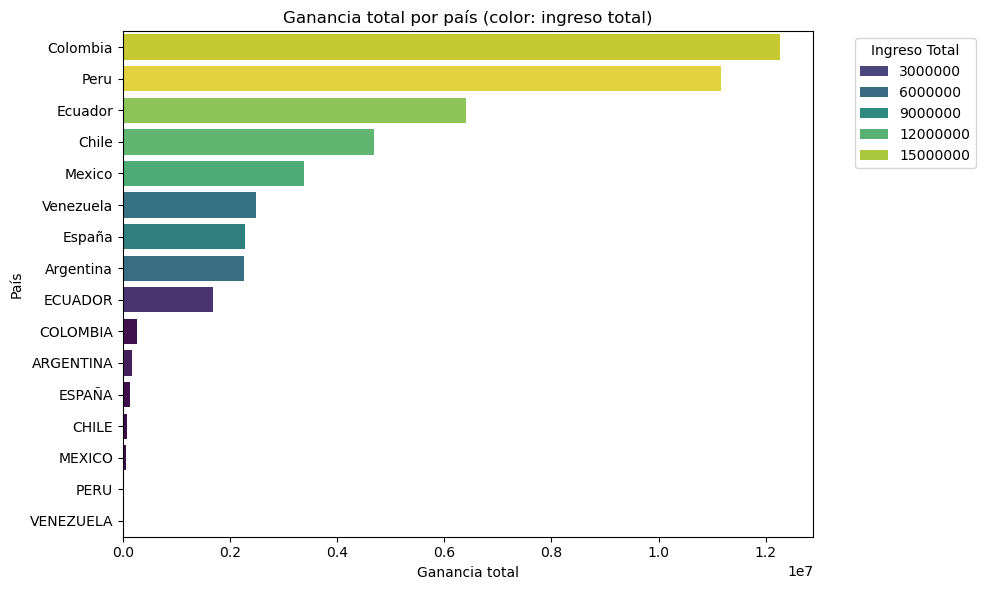

In [2056]:
# Distribución de ganancia por país, coloreando por ingreso total
ganancia_pais = (
    df_maestro.groupby('Pais')
    .agg({'Ganancia': 'sum', 'Ingreso_Total': 'sum'})
    .sort_values('Ganancia', ascending=False)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=ganancia_pais,
    x='Ganancia',
    y='Pais',
    hue='Ingreso_Total',
    palette='viridis',
    dodge=False
)
plt.title('Ganancia total por país (color: ingreso total)')
plt.xlabel('Ganancia total')
plt.ylabel('País')
plt.legend(title='Ingreso Total', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\edgar\AppData\Local\Temp\ipykernel_21028\591747685.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


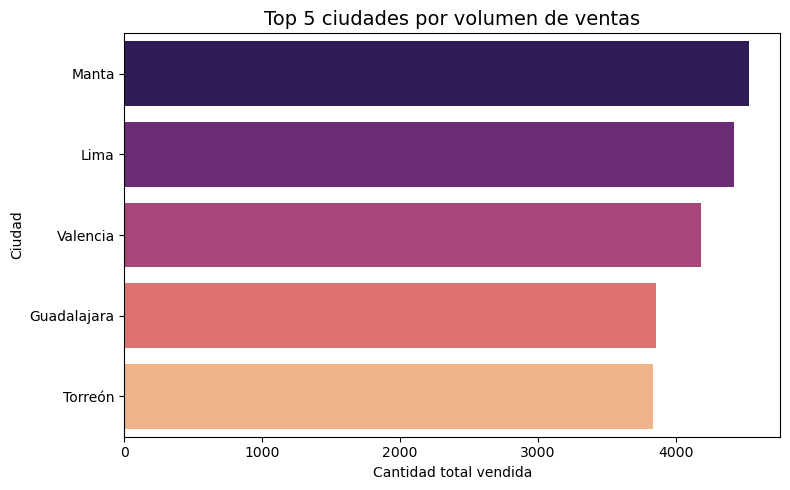

In [2057]:
# 🧭 1. Top 5 ciudades con mayor volumen de ventas (Cantidad total)
top_ciudades = (
    df_maestro
    .groupby('Ciudad')['Cantidad']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_ciudades.values,
    y=top_ciudades.index,
    palette='magma'
)
plt.title('Top 5 ciudades por volumen de ventas', fontsize=14)
plt.xlabel('Cantidad total vendida')
plt.ylabel('Ciudad')
plt.tight_layout()
plt.show()



## 📊👩🏽‍💻 Informe análisis Geográfico y de Ganancias

### 🏙️ Ciudades con mayor volumen de ventas
La gráfica evidencia el peso comercial de Manta, que lidera con fuerza en el volumen total de ventas. Le siguen Lima, Valencia, Guadalajara y Torreón, mostrando que la actividad comercial está bien repartida entre varias ciudades clave en Latinoamérica. Este top 5 nos pinta un mapa vibrante de los focos comerciales más movidos.

Este comportamiento puede reflejar tanto la densidad poblacional como una posible fidelización de clientes en estas zonas, lo que abre una puerta para estrategias de segmentación regional que jueguen con ofertas localizadas, logística optimizada y presencia de marca más cercana.

---

### 🌍 Distribución de Ganancias por País
Al mirar la ganancia total por país, Colombia se lleva la medalla de oro con un ingreso que le mete fuego al gráfico 🔥. Perú y Ecuador también están en la pelea con números fuertes, mientras que países como Chile y México muestran buen pulso, aunque un escalón más abajo. En contraste, Venezuela, Argentina y España reflejan ingresos mucho más bajos, y en el gráfico se ven con tonos oscuros que alertan sobre posible baja rentabilidad.

El uso de colores en la visualización nos da una mirada rápida a cómo se comporta el ingreso total: desde los tonos morados para ingresos más modestos hasta los vibrantes amarillos que brillan por su potencia económica. Esta diferenciación facilita detectar oportunidades y ajustar decisiones comerciales con visión estratégica.

---

### 🔍 Reflexión Final

Combinar estos dos gráficos nos deja ver claramente que hay zonas calientes donde la venta vuela, y otras donde la ganancia no está rindiendo. La clave está en unir esos datos con la mirada paisa—de rebusque, berraquera y visión local—para impulsar acciones precisas: ¿hay que reforzar campañas?, ¿redirigir esfuerzos?, ¿o celebrar el terreno ganado?
---


# 🎞️🧠 Analisis de marketing

C:\Users\edgar\AppData\Local\Temp\ipykernel_21028\3159256922.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\edgar\AppData\Local\Temp\ipykernel_21028\3159256922.py:16: UserWarning: 
The palette list has fewer values (13) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


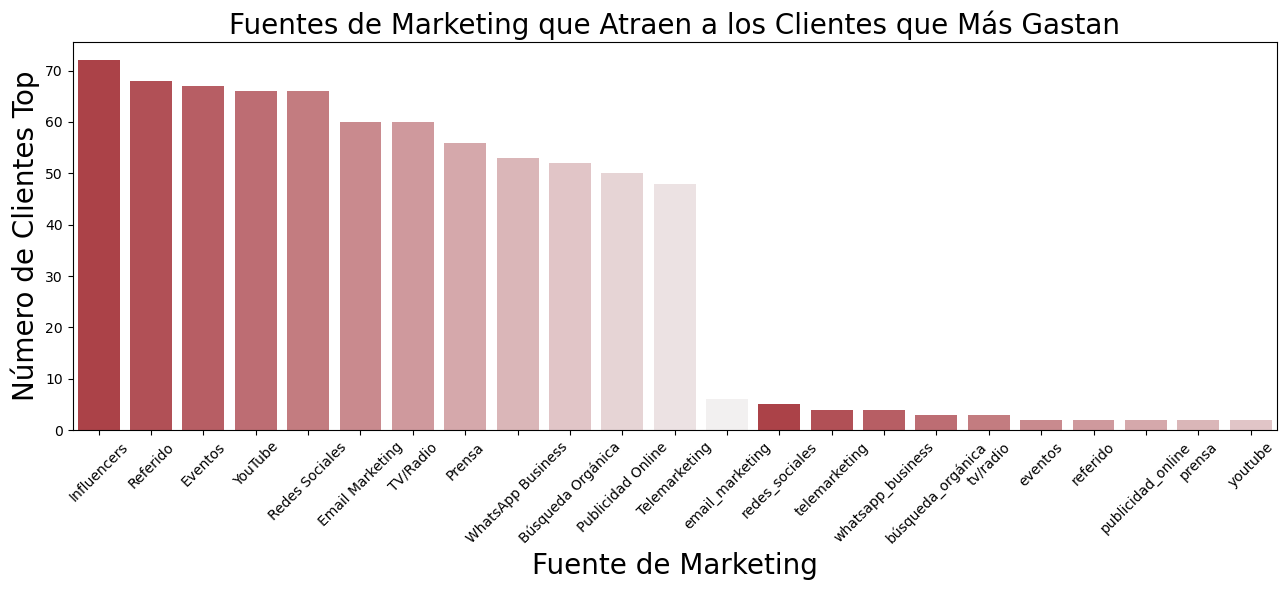

In [2058]:
# 1. Filtrar clientes top (Top 20% por GastoTotal)
threshold = df_maestro['Ingreso_Total'].quantile(0.80)
top_clients = df_maestro[df_maestro['Ingreso_Total'] >= threshold]

# 2. Contar fuentes de marketing entre estos clientes
marketing_counts = (
    top_clients
    .groupby('Fuente_Marketing')['ID_Cliente']
    .nunique()
    .reset_index(name='Cantidad')
    .sort_values(by='Cantidad', ascending=False)
)
# sox_palette = sns.light_palette("#BD3039", n_colors=len(pais_cuentas), reverse=True, input="hex")
# 3. Gráfico de barras magenta
plt.figure(figsize=(13, 6))
sns.barplot(
    data=marketing_counts,
    x='Fuente_Marketing',
    y='Cantidad',
    color='magenta'
)
plt.title('Fuentes de Marketing que Atraen a los Clientes que Más Gastan', fontsize=20)
plt.xlabel('Fuente de Marketing', fontsize=20)
plt.ylabel('Número de Clientes Top', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2059]:
# Paleta de los Boston Red Sox: rojo y azul oscuro
# Rojo: #BD3039, Azul: #0C2340

#sox_palette = sns.light_palette("#BD3039", n_colors=len(pais_cuentas), reverse=True, input="hex")
# Opcional: para un gradiente azul-rojo, puedes combinar dos paletas:
# from matplotlib.colors import LinearSegmentedColormap
# colors = ["#0C2340", "#BD3039"]
# sox_cmap = LinearSegmentedColormap.from_list("sox", colors, N=len(pais_cuentas))
# sox_palette = [sox_cmap(i/(len(pais_cuentas)-1)) for i in range(len(pais_cuentas))]

C:\Users\edgar\AppData\Local\Temp\ipykernel_21028\2367731502.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


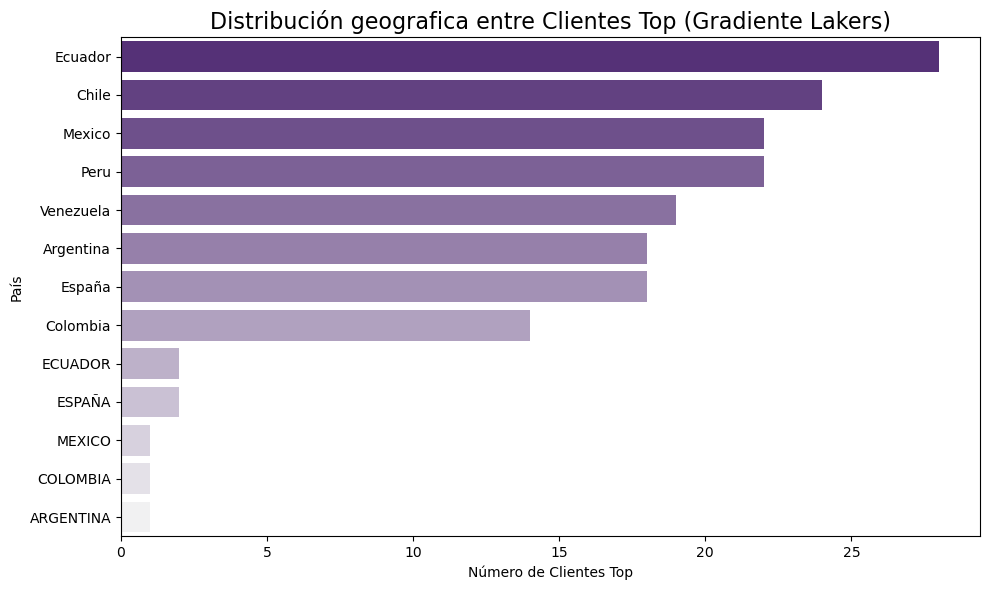

         Pais  Frecuencia
0     Ecuador          28
1       Chile          24
2      Mexico          22
3        Peru          22
4   Venezuela          19
5   Argentina          18
6      España          18
7    Colombia          14
8     ECUADOR           2
9      ESPAÑA           2
10     MEXICO           1
11   COLOMBIA           1
12  ARGENTINA           1


In [2060]:
# 1. Sumar ingreso total por cliente
clientes_ingreso = (
    df_maestro
    .groupby('ID_Cliente')['Ingreso_Total']
    .sum()
    .reset_index()
)

# 2. Definir top 20% de clientes por ingreso acumulado
threshold = clientes_ingreso['Ingreso_Total'].quantile(0.80)
top_clientes = clientes_ingreso[clientes_ingreso['Ingreso_Total'] >= threshold]

# 3. Asociar país a cada cliente top
cliente_pais = (
    df_maestro[['ID_Cliente','Pais']]
    .drop_duplicates()
)
top_clientes = top_clientes.merge(cliente_pais, on='ID_Cliente')

# 4. Top países entre clientes top (frecuencia)
pais_cuentas = (
    top_clientes['Pais']
    .value_counts()
    .reset_index()
)
pais_cuentas.columns = ['Pais','Frecuencia']

# 5. Graficar con gradiente de color estilo Lakers
plt.figure(figsize=(10, 6))
lakers_palette = sns.light_palette("#552583", n_colors=len(pais_cuentas), reverse=True)
sns.barplot(
    data=pais_cuentas,
    x='Frecuencia',
    y='Pais',
    palette=lakers_palette
)
plt.title('Distribución geografica entre Clientes Top (Gradiente Lakers)', fontsize=16)
plt.xlabel('Número de Clientes Top')
plt.ylabel('País')
plt.tight_layout()
plt.show()

# Ver tabla de frecuencias
print(pais_cuentas)


## 🎯 Informe de Hallazgos de Marketing 

### ¿Qué Fuente_Marketing atrae a los clientes que más gastan?

El gráfico de barras en magenta revela claramente quiénes traen a la gallada de clientes top que más desembolsan.  

- Influencers se lleva el primer puesto, conectando con la mayor cantidad de compradores de alto valor.  
- Le sigue Referido, demostrando que el boca a boca bien gestionado es pura berraquera.  
- Eventos aparece en tercer lugar, mostrando que la experiencia offline sigue haciendo su agosto.  

En contraste, canales como Búsqueda Orgánica y WhatsApp Business están quedando rezagados en la carrera por captar a quienes más gastan.  

---

### Reflexión sabrosa

Este hallazgo nos dice que la estrategia debe apalancarse en alianzas con influencers y programas de referido de alto impacto, sin descuidar eventos presenciales. Ahí está la receta para encender motores de venta y sacarle el jugo a cada peso invertido en marketing.  
